In [ ]:
import tensorflow as tf
import os
import json
import pandas as pd
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import collections
import random
import requests
import json
from math import sqrt
from PIL import Image
from tqdm.auto import tqdm

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_folder = "/content/drive/My Drive/WBC_Training_dataset"
test_folder = "/content/drive/My Drive/WBC_Testing_dataset"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your training and testing datasets using tf.keras.preprocessing.image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    image_size=(224, 224),  # Adjust the image size as per your requirement
    batch_size=32,
    class_names=['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_folder,
    image_size=(224, 224),  # Adjust the image size as per your requirement
    batch_size=32,
    class_names=['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
)

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Rescaling(1./255),
])

# Preprocess the data and apply data augmentation
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))
test_dataset = test_dataset.map(lambda x, y: (data_augmentation(x), y))

# Load MobileNetV2 model with pre-trained ImageNet weights
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',  # Use pre-trained ImageNet weights
    input_shape=(224, 224, 3)  # Adjust according to your image size
)

# Freeze the base model
base_model.trainable = False

# Add custom classification head
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)  # 5 classes in your dataset
model = tf.keras.Model(inputs, outputs)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Since you have integer class labels
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)


Found 2800 files belonging to 5 classes.
Found 700 files belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 77s 751ms/step - accuracy: 0.1958 - loss: 1.7934 - val_accuracy: 0.1871 - val_loss: 1.6427
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.1925 - loss: 1.6344 - val_accuracy: 0.2286 - val_loss: 1.6121
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - accuracy: 0.1878 - loss: 1.6144 - val_accuracy: 0.2014 - val_loss: 1.6091
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 351ms/step - accuracy: 0.1956 - loss: 1.6097 - val_accuracy: 0.1814 - val_loss: 1.6094
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 338ms/step - accuracy: 0.1928 - loss: 1.6105 - val_accuracy: 0.2129 - val_loss: 1.6087
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.1887 - loss: 1.6112 - val_accuracy: 0.1986 - val_loss: 1.6094
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 36s 336ms/step - accuracy: 0.1978 - loss: 1.6095 - val_acc

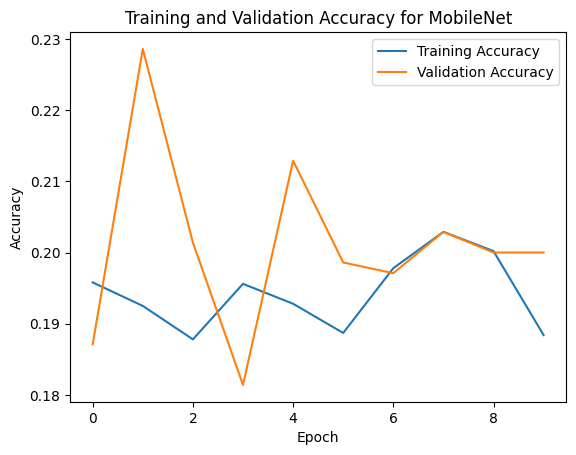

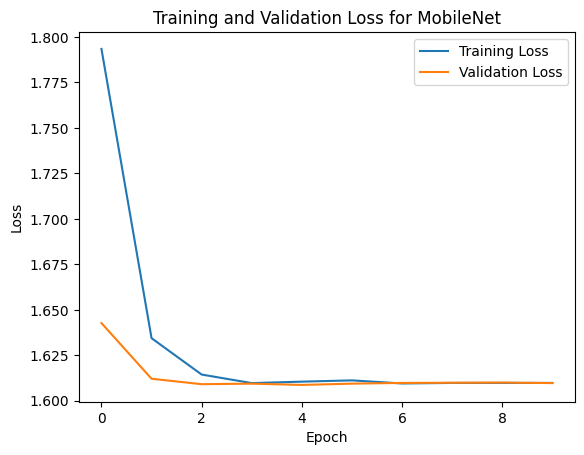

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy and loss values
train_accuracy = [0.1958, 0.1925, 0.1878, 0.1956, 0.1928, 0.1887, 0.1978, 0.2029, 0.2002, 0.1884]
val_accuracy = [0.1871, 0.2286, 0.2014, 0.1814, 0.2129, 0.1986, 0.1971, 0.2029, 0.2000, 0.2000]
train_loss = [1.7934, 1.6344, 1.6144, 1.6097, 1.6105, 1.6112, 1.6095, 1.6098, 1.6098, 1.6098]
val_loss = [1.6427, 1.6121, 1.6091, 1.6094, 1.6087, 1.6094, 1.6098, 1.6099, 1.6100, 1.6097]

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for MobileNet')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for MobileNet')
plt.legend()
plt.show()
